In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\blogs.csv")
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [4]:
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = ''.join(char for char in text if char not in string.punctuation)  # Remove punctuation
    tokens = nltk.word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)

# Apply preprocessing
df['cleaned_data'] = df['Data'].apply(preprocess_text)

# Check results
print(df[['Data', 'cleaned_data']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


                                                Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                        cleaned_data  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
1  newsgroups altatheism path cantaloupesrvcscmue...  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
4  xref cantaloupesrvcscmuedu altatheism53485 tal...  


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF feature extraction
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_data']).toarray()

# Target labels
y = df['Labels']


In [6]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Train the model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predictions
y_pred = nb.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8225
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.79      0.83      0.81        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.76      0.76      0.76        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       0.91      0.84      0.87        25
            misc.forsale       0.82      0.78      0.80        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.77      0.94      0.85        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.95      0.95      0.95        19
         sci.electronics       0.62      0.62      0.62        16
                 sci.med       0.8

In [9]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 435.7 kB/s eta 0:00:02
   ------ ------------------------------- 112.6/626.3 kB 930.9 kB/s eta 0:00:01
   ------------------------------- -------- 491.5/626.3 kB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
from textblob import TextBlob

# Sentiment analysis
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Data'].apply(get_sentiment)

# Examine distribution
print(df['Sentiment'].value_counts())


Positive    1543
Negative     457
Name: Sentiment, dtype: int64


Sentiment                 Negative  Positive
Labels                                      
alt.atheism                   0.23      0.77
comp.graphics                 0.24      0.76
comp.os.ms-windows.misc       0.22      0.78
comp.sys.ibm.pc.hardware      0.20      0.80
comp.sys.mac.hardware         0.24      0.76
comp.windows.x                0.27      0.73
misc.forsale                  0.16      0.84
rec.autos                     0.17      0.83
rec.motorcycles               0.26      0.74
rec.sport.baseball            0.29      0.71
rec.sport.hockey              0.34      0.66
sci.crypt                     0.19      0.81
sci.electronics               0.19      0.81
sci.med                       0.29      0.71
sci.space                     0.27      0.73
soc.religion.christian        0.13      0.87
talk.politics.guns            0.30      0.70
talk.politics.mideast         0.22      0.78
talk.politics.misc            0.22      0.78
talk.religion.misc            0.14      0.86


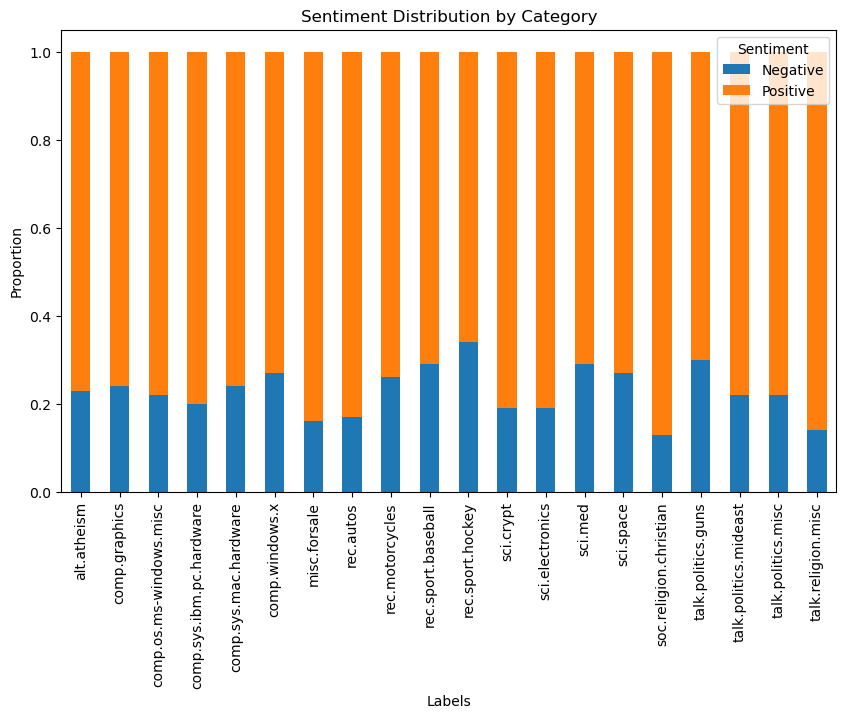

In [11]:
# Sentiment distribution by category
sentiment_distribution = df.groupby('Labels')['Sentiment'].value_counts(normalize=True).unstack()
print(sentiment_distribution)

# Plot sentiment distribution
import matplotlib.pyplot as plt

sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution by Category')
plt.ylabel('Proportion')
plt.show()


In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))


Precision: 0.8276176687627891
Recall: 0.8225
F1-Score: 0.8171026916205228
